<a href="https://colab.research.google.com/github/sugamthapa47/SugamThapa_INFO4670_Spring2026/blob/main/Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Data Quality Check

1.1 Using Python (pandas, matplotlib, or seaborn), load and inspect the Assignment 2 dataset.

In [28]:
# Write your code here

from google.colab import files
uploaded = files.upload()


Saving Assignment 2 dataset.csv to Assignment 2 dataset (1).csv


Write code to explore the data distribution (e.g., region, type, year) and check whether there is any bias. Provide both the code and your interpretation.

Columns in dataset:
Index(['Column 1', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

Region distribution:
 region
WestTexNewMexico       340
Albany                 338
BaltimoreWashington    338
Boise                  338
Boston                 338
Atlanta                338
California             338
Charlotte              338
Chicago                338
CincinnatiDayton       338
Columbus               338
DallasFtWorth          338
Denver                 338
Detroit                338
GrandRapids            338
GreatLakes             338
HarrisburgScranton     338
HartfordSpringfield    338
Houston                338
Indianapolis           338
Jacksonville           338
BuffaloRochester       338
LasVegas               338
LosAngeles             338
MiamiFtLauderdale      338
Louisville             338
Nashville              338
NewOrleansMobile  

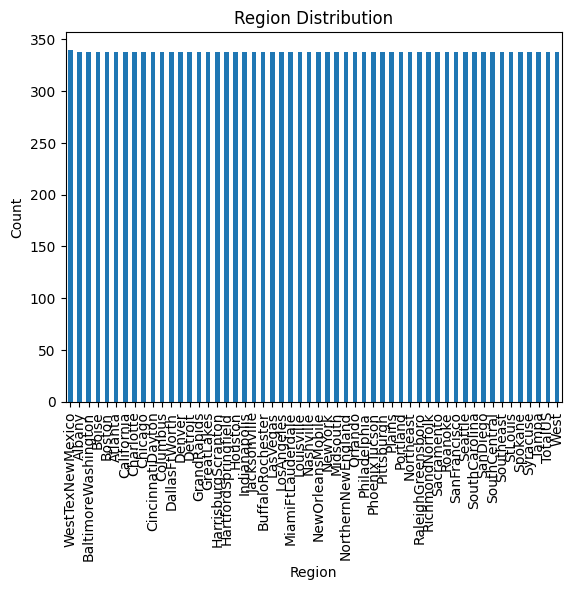


Type distribution:
 type
organic         9127
conventional    9126
Name: count, dtype: int64


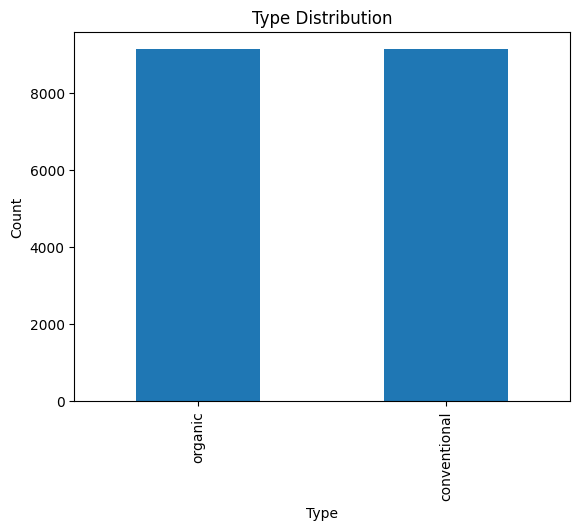


Year distribution:
 year
1904       1
2015    5615
2016    5616
2017    5722
2018    1300
Name: count, dtype: int64


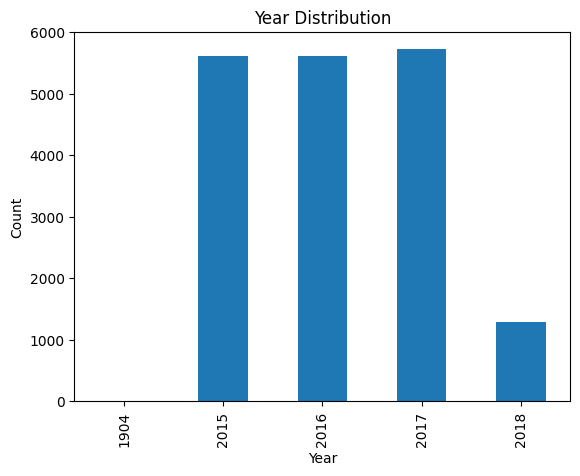


Top category in 'region' represents 1.86% of the data
✅ No strong dominance detected.

Top category in 'type' represents 50.00% of the data
⚠️ Potential bias detected: one category dominates the dataset.


In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Assume df is already loaded from previous step
df = pd.read_csv("Assignment 2 dataset.csv")

# Display column names so it's clear what we're analyzing
print("Columns in dataset:")
print(df.columns)

# ---- REGION DISTRIBUTION ----
if "region" in df.columns:
    region_counts = df["region"].value_counts()
    print("\nRegion distribution:\n", region_counts)

    region_counts.plot(kind="bar")
    plt.title("Region Distribution")
    plt.xlabel("Region")
    plt.ylabel("Count")
    plt.show()

# ---- TYPE DISTRIBUTION ----
if "type" in df.columns:
    type_counts = df["type"].value_counts()
    print("\nType distribution:\n", type_counts)

    type_counts.plot(kind="bar")
    plt.title("Type Distribution")
    plt.xlabel("Type")
    plt.ylabel("Count")
    plt.show()

# ---- YEAR DISTRIBUTION ----
if "year" in df.columns:
    year_counts = df["year"].value_counts().sort_index()
    print("\nYear distribution:\n", year_counts)

    year_counts.plot(kind="bar")
    plt.title("Year Distribution")
    plt.xlabel("Year")
    plt.ylabel("Count")
    plt.show()

# ---- SIMPLE BIAS CHECK ----
for col in ["region", "type"]:
    if col in df.columns:
        top_percentage = df[col].value_counts(normalize=True).iloc[0] * 100
        print(f"\nTop category in '{col}' represents {top_percentage:.2f}% of the data")

        if top_percentage > 50:
            print("⚠️ Potential bias detected: one category dominates the dataset.")
        else:
            print("✅ No strong dominance detected.")

1.2 Write Python code to check for duplicate rows and missing values in the dataset. Show the number of duplicates and missing values for each column. Then, explain (in comments or markdown) how you would handle these issues (e.g., drop, impute, or replace).

In [30]:
# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
print("Number of duplicate rows:", duplicate_rows)

# Check for missing values in each column
missing_values = df.isna().sum()
print("\nMissing values per column:")
print(missing_values)

# Optional: show missing value percentages
missing_percentage = (df.isna().mean() * 100).round(2)
print("\nMissing value percentage per column:")
print(missing_percentage)


Number of duplicate rows: 2

Missing values per column:
Column 1        0
Date            0
AveragePrice    0
Total Volume    1
4046            2
4225            1
4770            1
Total Bags      1
Small Bags      2
Large Bags      2
XLarge Bags     1
type            1
year            0
region          0
dtype: int64

Missing value percentage per column:
Column 1        0.00
Date            0.00
AveragePrice    0.00
Total Volume    0.01
4046            0.01
4225            0.01
4770            0.01
Total Bags      0.01
Small Bags      0.01
Large Bags      0.01
XLarge Bags     0.01
type            0.01
year            0.00
region          0.00
dtype: float64


1.3 Use Python code to print the number of rows and columns in the dataset (e.g., with df.shape). Based on the dataset size, explain (briefly) whether you think the dataset is sufficient for training a machine learning model.

In [31]:
# Print number of rows and columns
rows, columns = df.shape
print("Number of rows:", rows)
print("Number of columns:", columns)



Number of rows: 18254
Number of columns: 14


#2. Data Cleaning and Preprocessing

2.1 Remove the first column or “Column 1” from the dataset. Treat the ‘year’ variable as nominal.

In [32]:
import pandas as pd
import numpy as np

# Remove "Column 1" if it exists, otherwise drop the first column
if "Column 1" in df.columns:
    df = df.drop(columns=["Column 1"])
else:
    df = df.drop(columns=[df.columns[0]])

# Treat year as nominal (categorical)
if "year" in df.columns:
    df["year"] = df["year"].astype("category")

print("Updated shape:", df.shape)
print("First 5 columns now:", list(df.columns[:5]))
print("year dtype:", df["year"].dtype if "year" in df.columns else "year column not found")


Updated shape: (18254, 13)
First 5 columns now: ['Date', 'AveragePrice', 'Total Volume', '4046', '4225']
year dtype: category


2.2 Check for duplicate values and remove them.

In [33]:
before = df.shape[0]
df = df.drop_duplicates()
after = df.shape[0]

print("Rows before removing duplicates:", before)
print("Rows after removing duplicates:", after)
print("Duplicates removed:", before - after)


Rows before removing duplicates: 18254
Rows after removing duplicates: 18252
Duplicates removed: 2


2.3 Check for missing values. If a data record (row) only has a few missing values, replace the missing values with the median of the column feature in that specific “Region” variable. If most column values in a data record are missing, remove the data record.

In [34]:
import numpy as np
import pandas as pd

# Decide what "most missing" means (>= 50% of columns missing)
row_missing_ratio = df.isna().mean(axis=1)
to_drop = row_missing_ratio >= 0.50

print("Rows to drop (>=50% missing):", to_drop.sum())
df = df.loc[~to_drop].copy()

# Fill numeric missing values with median of that column within the same Region
# (only if Region exists)
numeric_cols = df.select_dtypes(include=[np.number]).columns

if "Region" in df.columns:
    # groupwise median fill
    df[numeric_cols] = df.groupby("Region")[numeric_cols].transform(
        lambda x: x.fillna(x.median())
    )
else:
    # fallback: overall median fill for numeric columns
    df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Optional: if any numeric missing values still exist (e.g., Region group all missing), fill remaining with overall median
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

print("\nMissing values after cleaning (top):")
print(df.isna().sum().sort_values(ascending=False).head(15))
print("Updated shape:", df.shape)


Rows to drop (>=50% missing): 1

Missing values after cleaning (top):
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64
Updated shape: (18251, 13)


2.4 Find the correlation between the variables and describe how the correlated values among the variables impact the model accuracy.


Correlation matrix (first 10 columns):


,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
AveragePrice,1.000000,-0.192767,-0.208329,-0.172944,-0.179458,-0.177103,-0.174743,-0.172953,-0.117604
Total Volume,-0.192767,1.000000,0.977863,0.974181,0.872203,0.963047,0.967238,0.880640,0.747158
4046,-0.208329,0.977863,1.000000,0.926110,0.833390,0.920057,0.925280,0.838646,0.699378
4225,-0.172944,0.974181,0.926110,1.000000,0.887856,0.905788,0.916032,0.810016,0.688810
4770,-0.179458,0.872203,0.833390,0.887856,1.000000,0.792315,0.802734,0.698473,0.679862
Total Bags,-0.177103,0.963047,0.920057,0.905788,0.792315,1.000000,0.994335,0.943009,0.804233
Small Bags,-0.174743,0.967238,0.925280,0.916032,0.802734,0.994335,1.000000,0.902589,0.806845
Large Bags,-0.172953,0.880640,0.838646,0.810016,0.698473,0.943009,0.902589,1.000000,0.710860
XLarge Bags,-0.117604,0.747158,0.699378,0.688810,0.679862,0.804233,0.806845,0.710860,1.000000


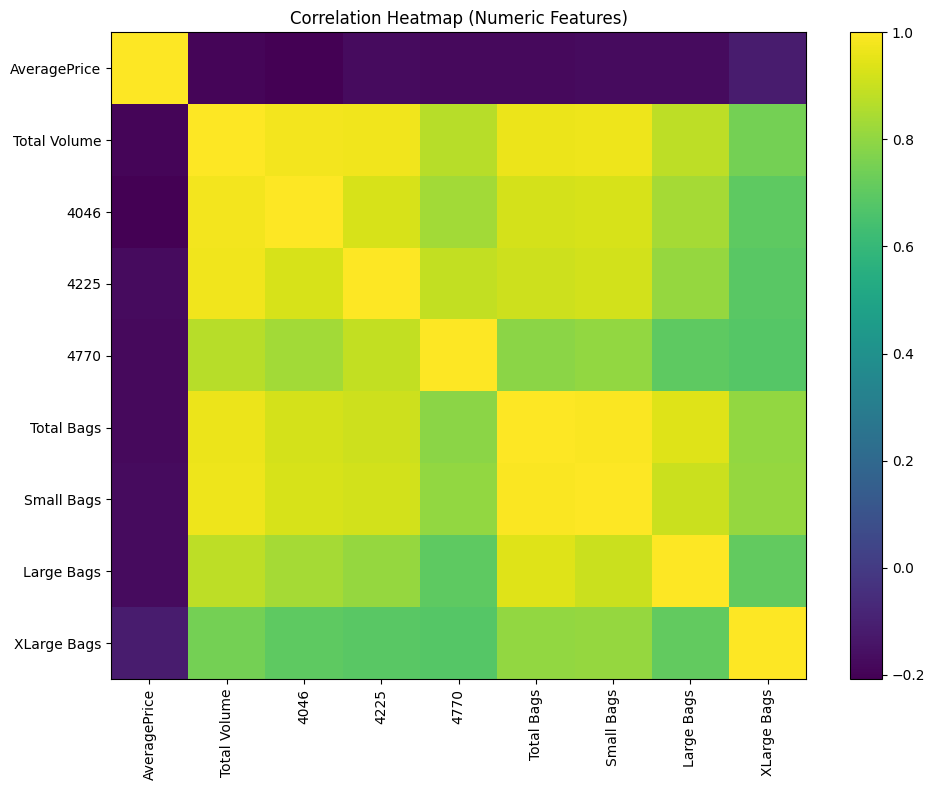


Top 10 strongest correlations (absolute value):
Small Bags    Total Bags      0.994335
Total Bags    Small Bags      0.994335
4046          Total Volume    0.977863
Total Volume  4046            0.977863
              4225            0.974181
4225          Total Volume    0.974181
Small Bags    Total Volume    0.967238
Total Volume  Small Bags      0.967238
Total Bags    Total Volume    0.963047
Total Volume  Total Bags      0.963047
dtype: float64


In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Correlation for numeric columns only
num_df = df.select_dtypes(include=[np.number])

corr = num_df.corr()
print("Correlation matrix (first 10 columns):")
display(corr.iloc[:10, :10])

# Heatmap-style visualization using matplotlib (no seaborn required)
plt.figure(figsize=(10, 8))
plt.imshow(corr, aspect="auto")
plt.colorbar()
plt.title("Correlation Heatmap (Numeric Features)")
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.tight_layout()
plt.show()

# Show strongest correlations (excluding self-correlation)
pairs = corr.abs().unstack().sort_values(ascending=False)
pairs = pairs[pairs < 1]  # remove 1.0 self correlations
print("\nTop 10 strongest correlations (absolute value):")
print(pairs.head(10))


#3. Exploratory Data Analysis (EDA)


3.1 Describe the variables
- Describe all variables in the dataset.
- For continuous variables: report **range (min, max), mean, median, and distribution**.
- For categorical variables: list unique values.

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Separate numeric and categorical variables
numeric_cols = df.select_dtypes(include=[np.number]).columns
categorical_cols = df.select_dtypes(exclude=[np.number]).columns

print("Numeric variables summary:")
display(df[numeric_cols].describe())

print("\nCategorical variables and unique values:")
for col in categorical_cols:
    print(f"\n{col}:")
    print(df[col].unique())


Numeric variables summary:


,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
count,18251.000000,1.825100e+04,1.825100e+04,1.825100e+04,1.825100e+04,1.825100e+04,1.825100e+04,1.825100e+04,18251.000000
mean,1.406020,8.505523e+05,2.929769e+05,2.951225e+05,2.283727e+04,2.396140e+05,1.821767e+05,5.433228e+04,3106.086096
std,0.402675,3.453367e+06,1.264923e+06,1.204058e+06,1.074584e+05,9.861913e+05,7.461396e+05,2.439532e+05,17691.955036
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,1.100000,1.084067e+04,8.543500e+02,3.008325e+03,0.000000e+00,5.089525e+03,2.851225e+03,1.274550e+02,0.000000
50%,1.370000,1.073542e+05,8.643200e+03,2.905673e+04,1.849900e+02,3.973853e+04,2.635161e+04,2.647270e+03,0.000000
75%,1.660000,4.329430e+05,1.109972e+05,1.501258e+05,6.240690e+03,1.107789e+05,8.333475e+04,2.200730e+04,132.365000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000



Categorical variables and unique values:

Date:
['12-27-2015' '12-20-2015' '12-13-2015' '12-6-2015' '11-29-2015'
 '11-22-2015' '11-15-2015' '11-8-2015' '11-1-2015' '10-25-2015'
 '10-18-2015' '10-11-2015' '10-4-2015' '9-27-2015' '9-20-2015' '9-13-2015'
 '9-6-2015' '8-30-2015' '8-23-2015' '8-16-2015' '8-9-2015' '8-2-2015'
 '7-26-2015' '7-19-2015' '7-12-2015' '7-5-2015' '6-28-2015' '6-21-2015'
 '6-14-2015' '6-7-2015' '5-31-2015' '5-24-2015' '5-17-2015' '5-10-2015'
 '5-3-2015' '4-26-2015' '4-19-2015' '4-12-2015' '4-5-2015' '3-29-2015'
 '3-22-2015' '3-15-2015' '3-8-2015' '3-1-2015' '2-22-2015' '2-15-2015'
 '2-8-2015' '2-1-2015' '1-25-2015' '1-18-2015' '1-11-2015' '1-4-2015'
 '12-25-2016' '12-18-2016' '12-11-2016' '12-4-2016' '11-27-2016'
 '11-20-2016' '11-13-2016' '11-6-2016' '10-30-2016' '10-23-2016'
 '10-16-2016' '10-9-2016' '10-2-2016' '9-25-2016' '9-18-2016' '9-11-2016'
 '9-4-2016' '8-28-2016' '8-21-2016' '8-14-2016' '8-7-2016' '7-31-2016'
 '7-24-2016' '7-17-2016' '7-10-2016' '7-3-2016

3.2 Inspect the earliest recorded date
- Find the earliest `Date`.
- Check if there are avocado prices recorded from the earliest date up to 2010.
- Comment: does the earliest data point look reasonable? Keep or remove?

In [37]:
# Ensure Date is datetime
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

# Find earliest date
earliest_date = df["Date"].min()
print("Earliest recorded date:", earliest_date)

# Check if data exists from earliest date up to 2010
data_up_to_2010 = df[df["Date"].dt.year <= 2010]

print("Number of records from earliest date up to 2010:", data_up_to_2010.shape[0])


Earliest recorded date: 1904-01-21 00:00:00
Number of records from earliest date up to 2010: 1


3.3 Highest average price
- Find the highest value in "AveragePrice".
- Report which region it belongs to.
- Describe how you obtained the result.

In [38]:
# Find highest AveragePrice
max_price = df["AveragePrice"].max()
print("Highest AveragePrice:", max_price)

# Find the row(s) with this highest price
highest_price_row = df[df["AveragePrice"] == max_price]
display(highest_price_row[["AveragePrice", "region", "Date"]])

Highest AveragePrice: 3.25


,AveragePrice,region,Date
14125,3.25,SanFrancisco,2016-10-30


3.4 Highest total volume
- Find the highest total volume of avocados.
- Report which region it belongs to.
- Describe how you obtained the result.

In [39]:
# Find highest total volume
max_volume = df["Total Volume"].max()
print("Highest Total Volume:", max_volume)

# Find the row(s) with this highest volume
highest_volume_row = df[df["Total Volume"] == max_volume]
display(highest_volume_row[["Total Volume", "region", "Date"]])

Highest Total Volume: 62505646.52


,Total Volume,region,Date
9097,62505646.52,TotalUS,2018-02-04
